---
title: Lecture 2
subtitle: Morphological Operations and Thresholding
date: 2024-09-02
downloads:
  - file: ../assets/02_lecture.pdf
    title: 02_lecture.pdf
  - file: 02_lecture.ipynb
    title: 02_lecture.ipynb
---

## Erosion and Dilation

### Import required libraries

In [1]:
import cv2
import os
import numpy as np
from matplotlib import pyplot as plt

### Erosion

[Erosion](wiki:Erosion_(morphology)) in image processing is a morphological operation that reduces the boundaries of foreground objects in a binary image. It works by applying a structuring element ([kernel](wiki:Kernel_(image_processing))[^kernel]) to each pixel, shrinking object boundaries and removing small noise, effectively eroding away the edges of objects. 

:::{tip}
This operation is useful for separating objects that are close together or for removing small details.
:::

[^kernel]: A kernel is a small matrix used for image processing operations. This is accomplished by doing a convolution between the image and the kernel. The accompanying video does an excellent job of describing what a convolution is.
    :::{iframe} https://www.youtube.com/embed/KuXjwB4LzSA?si=_CbjXaPekJcN5PYY
    :width: 100%
    But what is a convolution?
    :::

#### Isotropic erosion

Isotropic erosion uniformly shrinks object boundaries in all directions.

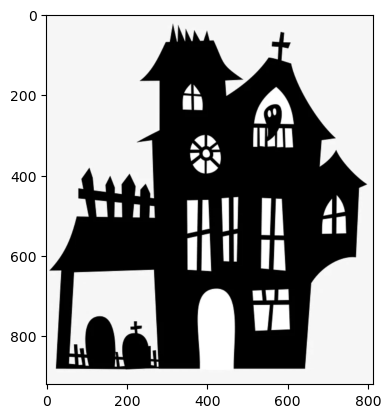

In [4]:
house_img = cv2.imread(os.path.relpath('assets/ShadowHouse.png'), cv2.IMREAD_GRAYSCALE)
plt.imshow(house_img, cmap='gray', vmin=0, vmax=255)
plt.show()

Creates a 15x15 kernel of ones and uses it to erode the image via the [erode](#card-erode) function, shrinking object boundaries. The eroded image is then displayed in grayscale using Matplotlib.

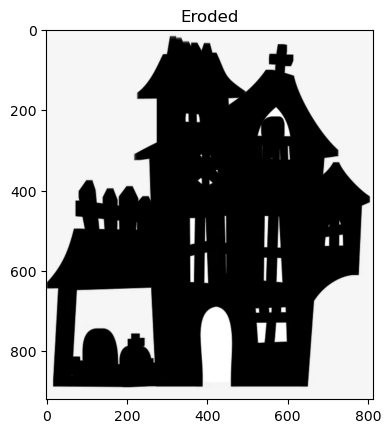

In [7]:
# Create a 15x15 kernel (structuring element) filled with ones, used for the erosion operation
kernel = np.ones((15,15), dtype=np.uint8)

# shrink the boundaries of the objects in the image via erosion 
img_eroded = cv2.erode(house_img, kernel)

# Display the eroded image using Matplotlib in grayscale
plt.imshow(img_eroded, cmap='gray', vmin=0, vmax=255); plt.title('Eroded')
plt.show()

#### Anisotropic erosion

Anisotropic erosion is not uniform in all directions.

This code creates two custom kernels for vertical and horizontal erosion, applies these kernels to an image to perform directional erosion, and then displays the resulting vertically and horizontally eroded images side by side.

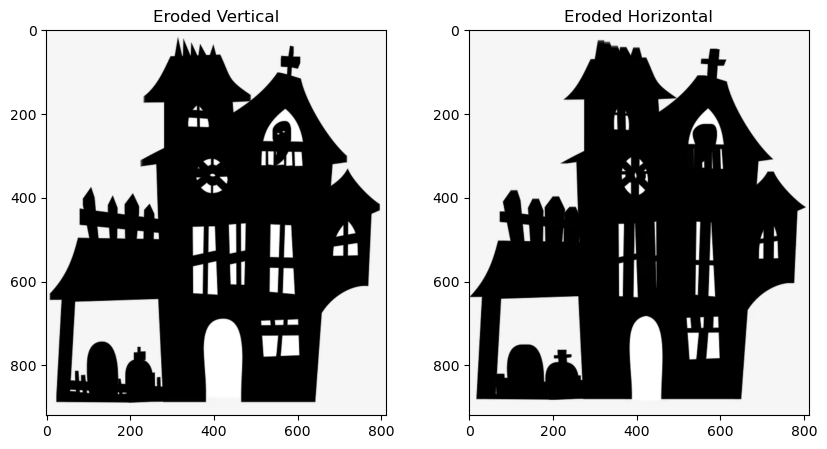

In [16]:
# Create a vertical kernel with a column of ones in the center
kernel_vert = np.zeros((15,15), dtype=np.uint8)
kernel_vert[:, 7] = 1

# Create a horizontal kernel with a row of ones in the center
kernel_horiz = np.zeros((15,15), dtype=np.uint8)
kernel_horiz[7, :] = 1

# Apply vertical erosion to the image using the vertical kernel
img_eroded_vert = cv2.erode(house_img, kernel_vert)

# Apply horizontal erosion to the image using the horizontal kernel
img_eroded_horiz = cv2.erode(house_img, kernel_horiz)

# Display the results: vertical erosion on the left, horizontal erosion on the right
plt.figure(figsize=[10, 5])
plt.subplot(121); plt.imshow(img_eroded_vert, cmap='gray', vmin=0, vmax=255); plt.title('Eroded Vertical')
plt.subplot(122); plt.imshow(img_eroded_horiz, cmap='gray', vmin=0, vmax=255); plt.title('Eroded Horizontal')
plt.show()

The image shows the effects of vertical and horizontal erosion on a silhouette of a haunted house. The left side displays the result of vertical erosion, where the image is primarily shrunk along the vertical axis, reducing the height of vertical features. The right side shows the result of horizontal erosion, where the image is primarily shrunk along the horizontal axis, narrowing the width of horizontal features.

### Dilation

[Dilation](wiki:Dilation_(morphology)) in image processing is a morphological operation that increases the boundaries of foreground objects in a binary image. It works by applying a structuring element kernel to each pixel, expanding object boundaries. 

:::{tip}
This operation is useful for object detection by merging or connecting separate components into a single object.
:::